In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/eergy-efficiency-dataset/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


There is no null value. Moreover all the values are integer or float. So the data is clean and ready to be explored and feeded to a model.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
X2,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
X3,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
X4,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
X5,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
X6,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
X7,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
X8,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
Y1,768.0,22.307201,10.090196,6.01,12.9925,18.95,31.6675,43.10
Y2,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

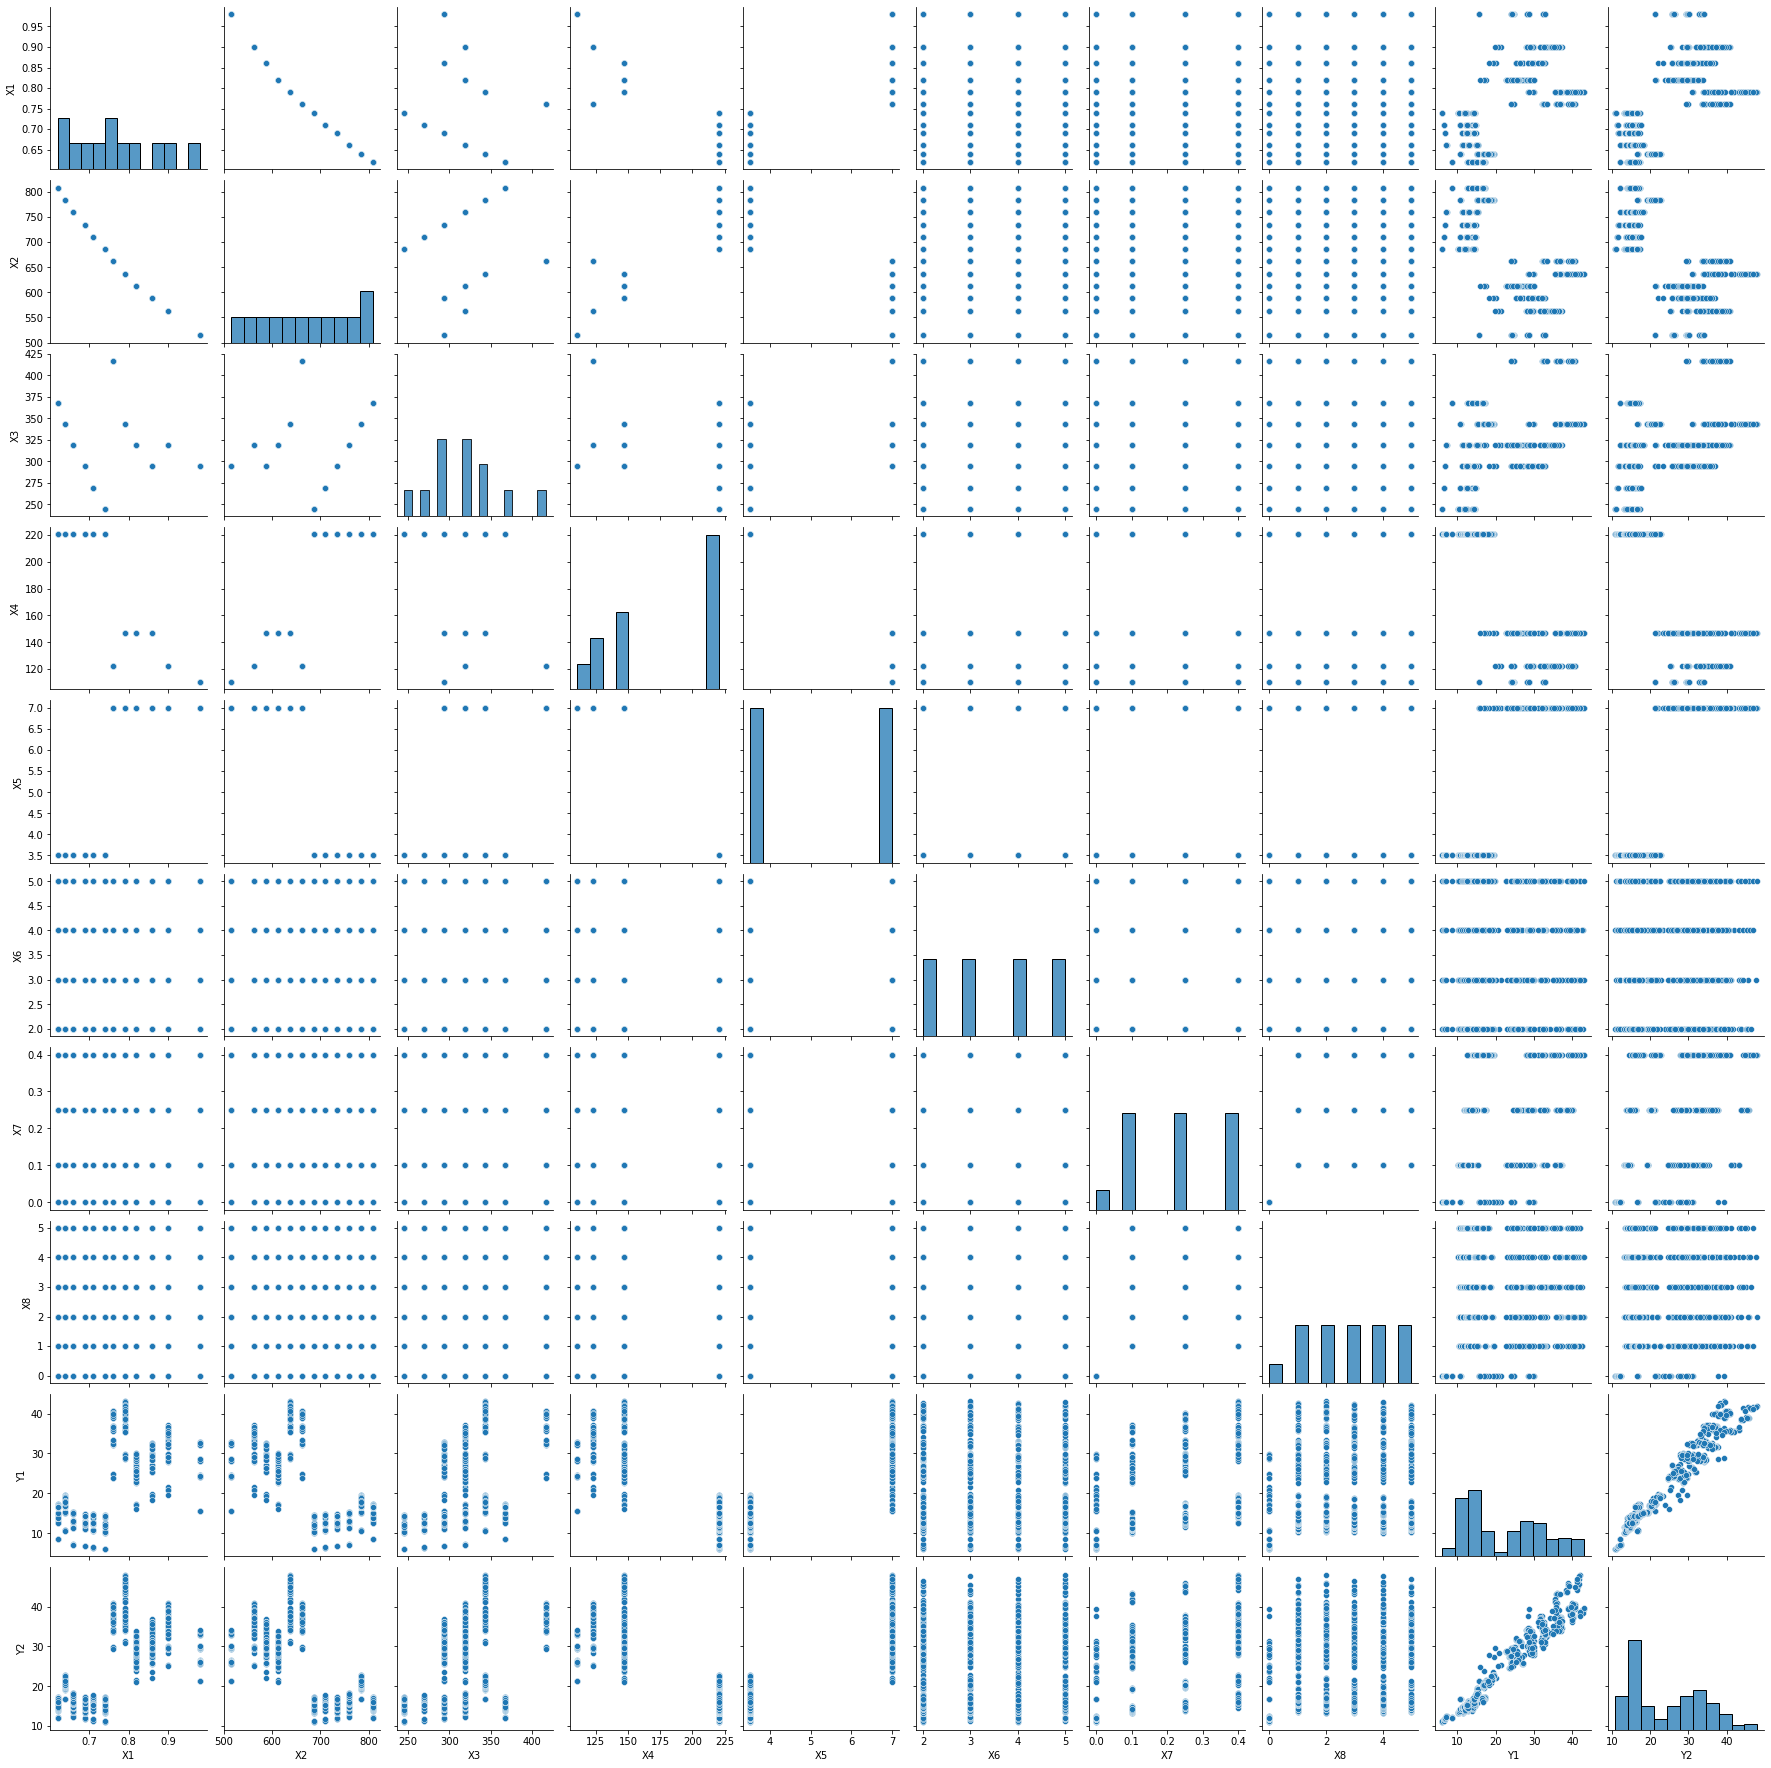

In [6]:
sns.pairplot(df)

* From this graph it can be easily observed that y1 and y2 are highly correlated.
* Both y1 and y2 is correlated with X1, X2, X4 and X5

<AxesSubplot:>

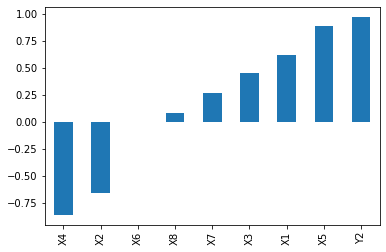

In [7]:
df.corr()['Y1'].sort_values()[:-1].plot.bar()

* This correlation plot shows that y1 and y2 which are heating load and cooling load are almost perfectly correlated. This was expected.
* X4 and X5 are also highly correlated with Y1, so they are also correlated with Y2. These are roof area and overall height. This is also expected beacuse they both increase the volume of the house which makes it harder to heat or cool.
* Lastly X1, X2 and X3 are corelated to y1 (y2, too). These are relative compactness, surface area and wall area. These are also expected.
* However X6 and X8 have almost 0 correlation. These values are orientation and glazing area distribution. This also makes sense because these values are irrelevant.

<AxesSubplot:>

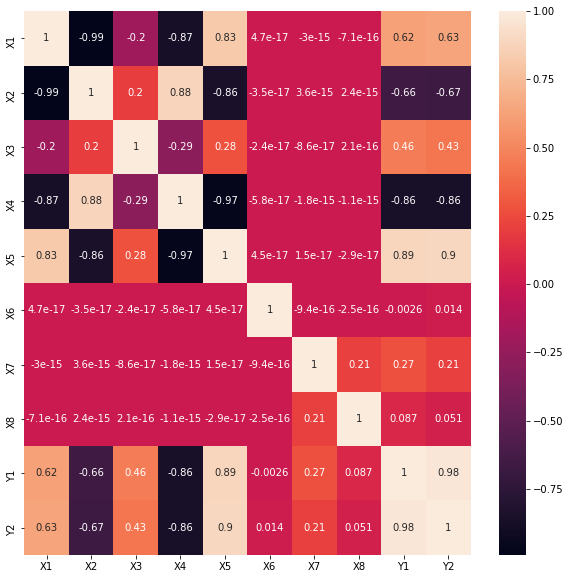

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

This correlation heatmap shows that X1 is almost perfectly correlated to X2. This means if we feed both to the model we would increase bias because they are repetition of each other. Same goes for X4 and X5. So we will drop one of both.
However let's keep the original dataframe to compare the results.

In [9]:
df2 = df.drop(['X1','X4'], axis=1)

# Model

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
X = df2.drop(['Y1', 'Y2'], axis=1)
y = df2[['Y1', 'Y2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
models = [LinearRegression, ElasticNet, Lasso, DecisionTreeRegressor, RandomForestRegressor]
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) ** .5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('*'*50)

RMSE of LinearRegression model is: 3.3378415184185064
R2 value of LinearRegression is: 0.8841930131579959
**************************************************
RMSE of ElasticNet model is: 4.380582571532095
R2 value of ElasticNet is: 0.8017167268375901
**************************************************
RMSE of Lasso model is: 4.510926688260811
R2 value of Lasso is: 0.7898075474761577
**************************************************
RMSE of DecisionTreeRegressor model is: 1.6391648702499308
R2 value of DecisionTreeRegressor is: 0.9712286411633256
**************************************************
RMSE of RandomForestRegressor model is: 1.4240671503407638
R2 value of RandomForestRegressor is: 0.9782954075288617
**************************************************


Linear regession is the best model among the three linear models. However tree models resulted much better. Their error is pretty low. Mean values of y1 and y2 are around 20 and standard deviation of them are around 10. The total rmse for y1 and y2 is around 1 which is a good value according to the mean and standard deviation of y1 and y2. Moreover 98% R^2 is also a good value.

In [13]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

SVR doesn't support multiple outputs so another class is used for outputing 2 values.

In [14]:
svm = SVR(kernel='linear', max_iter=10**5)
reg = MultiOutputRegressor(svm)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
err = mean_squared_error(y_test, pred) ** .5
r2 = np.mean(r2_score(y_test, pred))
print(err, r2)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


4.059392378770926 0.8296033661246677


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


That's not an improvement. Lastly let's try without dropping the irrelevent values, and highly correleted values.

In [15]:
X = df.drop(['Y1', 'Y2'], axis=1)
y = df[['Y1', 'Y2']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
for model in models:
    reg = model()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    err = mean_squared_error(y_test, pred) ** .5
    print(f'RMSE of {model.__name__} model is: {err}')
    print(f'R2 value of {model.__name__} is: {np.mean(r2_score(y_test, pred))}')
    print('*'*50)

RMSE of LinearRegression model is: 3.1227275826616827
R2 value of LinearRegression is: 0.9004843349680314
**************************************************
RMSE of ElasticNet model is: 4.464752847777525
R2 value of ElasticNet is: 0.797661415982833
**************************************************
RMSE of Lasso model is: 4.616988343080106
R2 value of Lasso is: 0.7836191010986135
**************************************************
RMSE of DecisionTreeRegressor model is: 1.5849012287085609
R2 value of DecisionTreeRegressor is: 0.9733209292890714
**************************************************
RMSE of RandomForestRegressor model is: 1.2982622377241182
R2 value of RandomForestRegressor is: 0.9820995496782134
**************************************************


Values are really close to the first values so dropping those values didn't change the results. Feeding or not feeding those 2 values doesn't make any difference on the error so we may drop those values because it would decrease the computing time.